In [13]:
from random import sample
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from math import pi, sin, cos
# %run task_1.ipynb import binpoisk
import nbimporter
import task_1

# Градиентный спуск

In [14]:
def grad_descent(f, df, start, step_searcher=task_1.binpoisk, eps=1e-6, max_iters=100):
    x = start
    prev = np.zeros_like(x)

    points = [np.append(start, f(start))]

    while np.linalg.norm(x - prev) > eps:
        if len(points) > max_iters:
            break

        dfx = df(x)
        dfx = dfx / np.sqrt(np.sum(dfx**2))
        step, _ = step_searcher(lambda s: f(x - s * dfx), -1, 1)
        prev = x
        x = x - step * dfx
        points.append(np.append(x, f(x)))

    return np.array(points)

# Парабола

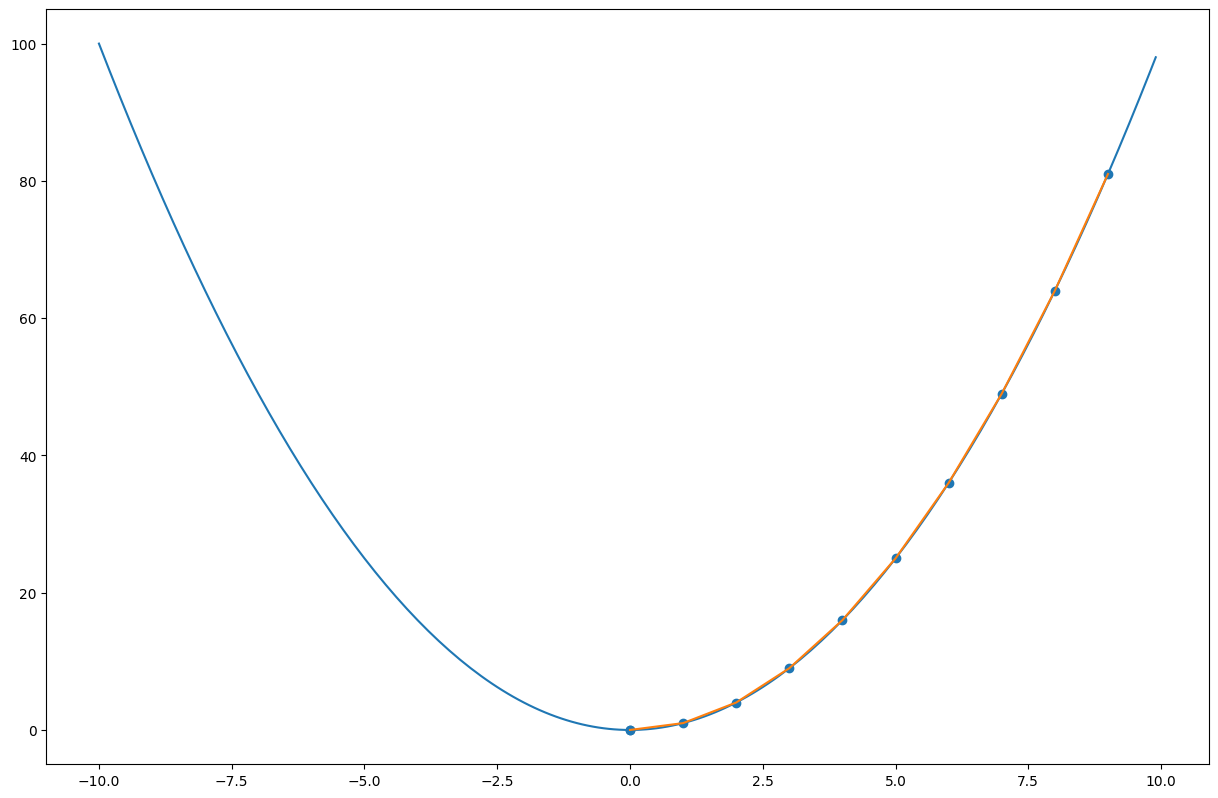

In [15]:
points = grad_descent(lambda x: x * x, lambda x: 2 * x, 9, task_1.binpoisk)
x = np.arange(-10, 10, 0.1)
y = list(map(lambda x:x*x, x))
plt.plot(x, y)
plt.plot(points[:, 0], points[:, 1])
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

def plot_3d(ax, fun, x, y, alpha=0.25):
    # x = np.arange(-pi, 0, 0.1)
    # y = np.arange(-pi/2, pi/2, 0.1)
    xmin, xmax = x
    ymin, ymax = y

    x = np.arange(xmin, xmax, 0.1)
    y = np.arange(ymin, ymax, 0.1)
    x, y = np.meshgrid(x, y)
    z = fun([x, y])  # np.sin(x) * np.cos(y)
    ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=alpha)

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# plot_3d(ax, lambda x, y:)
# plt.show()

# Пример работы

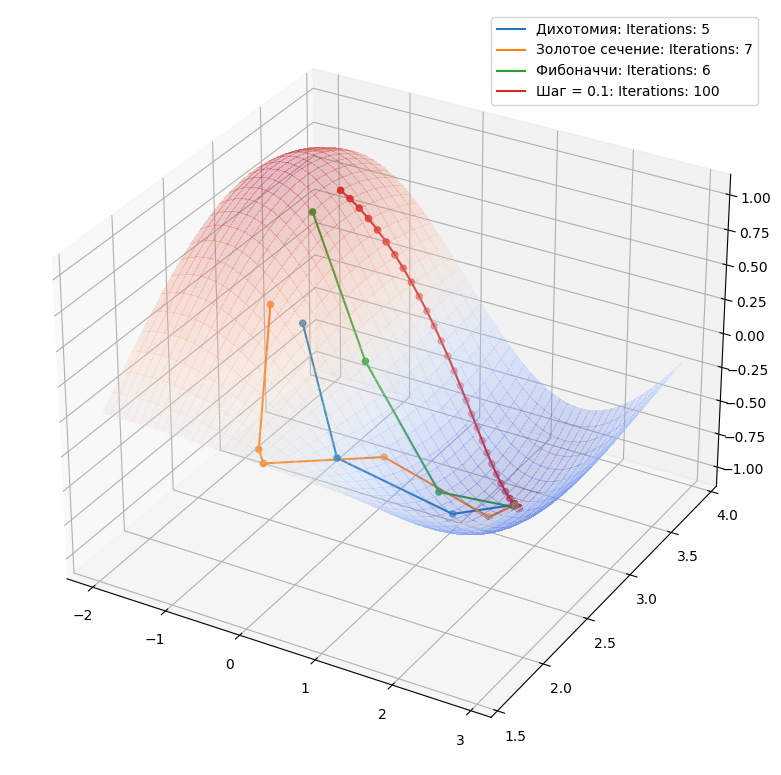

In [17]:
def f(xy : np.array):
    x, y = xy
    return np.sin(x) * np.cos(y)

def df(xy: np.array):
    x, y = xy
    return np.array([cos(x) * cos(y), - sin(x) * sin(y)])

def plot_points(ax, points, label=""):
    ax.plot3D(points[:, 0], points[:, 1], points[:, 2], label="{}: Iterations: {}".format(label, len(points) - 1))
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# [-0.8, 2.4]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
points_bin = grad_descent(f, df, [-0.5, 2.5], task_1.binpoisk)
points_golden = grad_descent(f, df, [-0.8, 2.4], task_1.golden)
points_fib = grad_descent(f, df, [-1, 3], task_1.fibonacci_eps)
points_fixed = grad_descent(f, df, [-1, 3.3], lambda _,__,___: (0.1,[]))

plot_points(ax, points_bin, label="Дихотомия")
plot_points(ax, points_golden, label="Золотое сечение")
plot_points(ax, points_fib, label="Фибоначчи")
plot_points(ax, points_fixed, label="Шаг = 0.1")

plot_3d(ax, f, [-2, 3], [1.6, 4])
plt.legend()
plt.show()

# Сравнение различных методов одномерного поиска

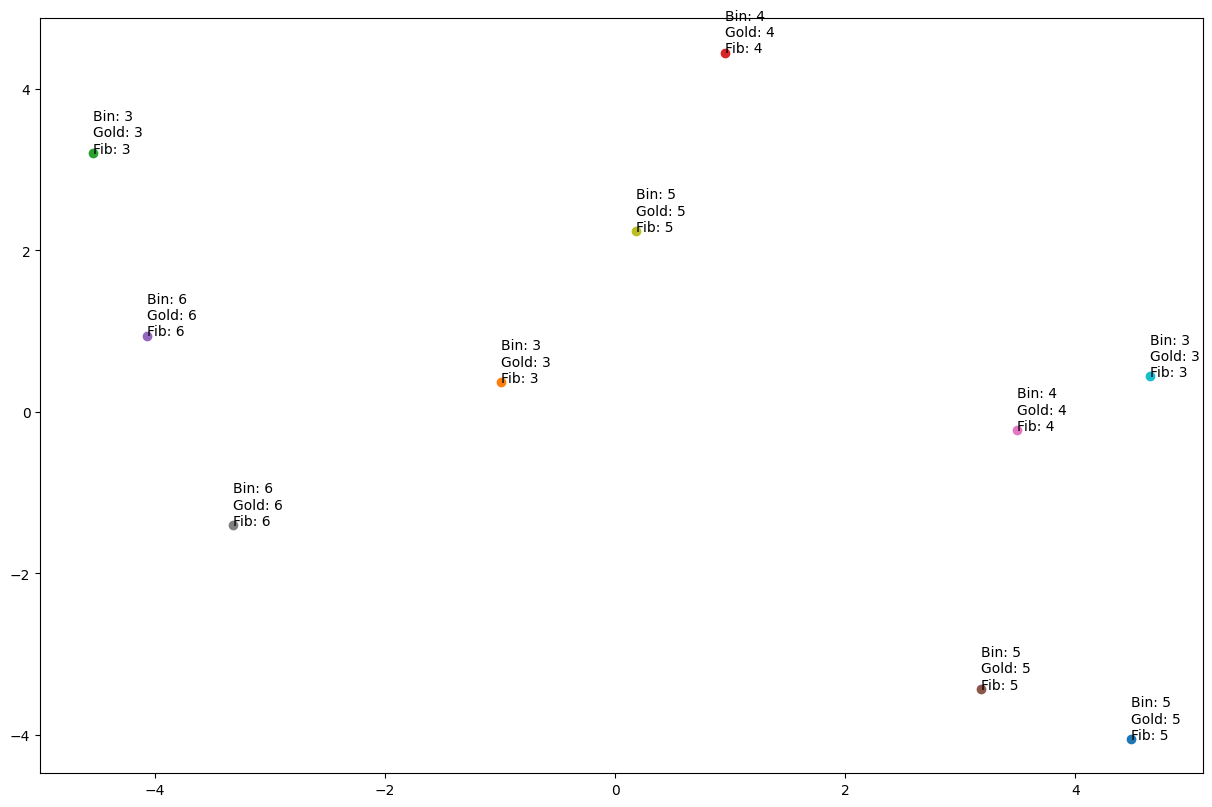

Points: 10
Differences: 0
[]
Points: 1000
Differences: 0
[]


In [18]:
def try_random_points(points_cnt=10, plot=False):
    space = list(np.linspace(-5, 5, 10000))
    differences = []
    for x, y in zip(sample(space, points_cnt), sample(space, points_cnt)):
        iters_bin = len(grad_descent(f, df, [x, y], task_1.binpoisk)) - 1
        iters_golden = len(grad_descent(f, df, [x, y], task_1.golden)) - 1
        iters_fib = len(grad_descent(f, df, [x, y], task_1.fibonacci_eps)) - 1

        if not iters_fib == iters_golden == iters_fib:
            differences.append(((x,y),iters_bin, iters_golden, iters_fib))

        if plot:
            plt.scatter(x, y)
            plt.annotate("Bin: {}\nGold: {}\nFib: {}".format(iters_bin, iters_golden, iters_fib), (x, y))

    if plot:
        plt.show()

    print("Points:", points_cnt)
    print("Differences:", len(differences))
    print(differences)

try_random_points(plot=True)
try_random_points(1000, False)